In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from google.colab import files
uploaded=files.upload()


Saving Iris.csv to Iris (4).csv


In [29]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'petal width (cm)')

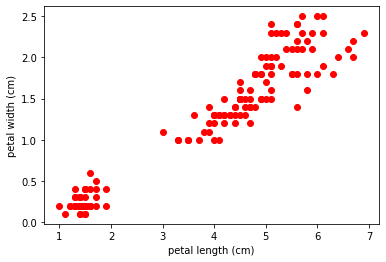

In [51]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'], color='Red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

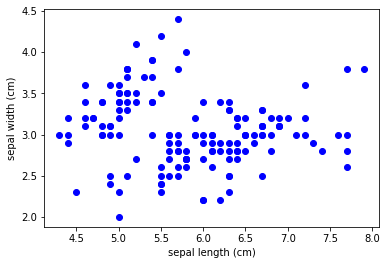

In [52]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], color='Blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'width (cm)')

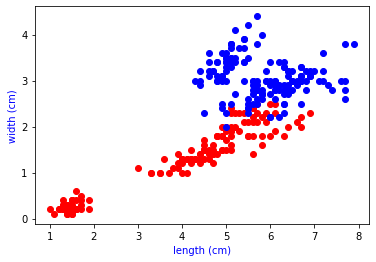

In [60]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'], color='Red',label='Petal')
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], color='Blue',label='Sepal')
plt.xlabel('length (cm)',color='Blue')
plt.ylabel('width (cm)',color='Blue')

In [54]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']])
    sse.append(km2.inertia_)

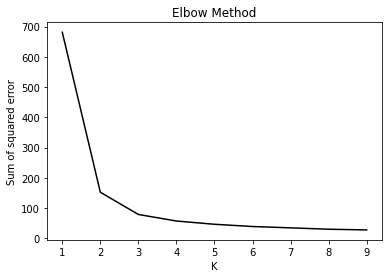

In [55]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')
plt.plot(k_rng,sse,color='Black')

In [56]:
km1 = KMeans(n_clusters=3)
y_predicted_1 = km1.fit_predict(df[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']])
y_predicted_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [57]:
df['cluster']=y_predicted_1
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
km1.cluster_centers_

array([[4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [1.462     , 0.246     , 5.006     , 3.428     ],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

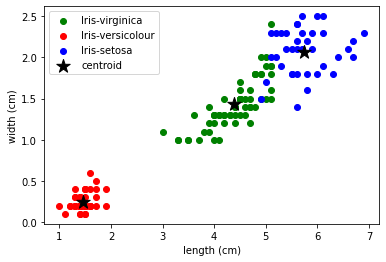

In [61]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label = 'Iris-virginica')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label = 'Iris-versicolour')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',label = 'Iris-setosa')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=200)
plt.xlabel('length (cm)')
plt.ylabel('width (cm)')
plt.legend()

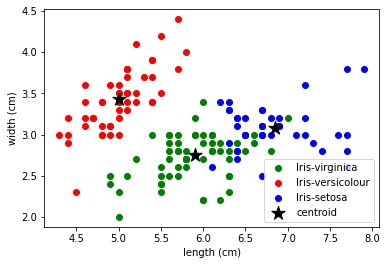

In [62]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',label = 'Iris-virginica')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label = 'Iris-versicolour')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='blue',label = 'Iris-setosa')
plt.scatter(km1.cluster_centers_[:,2],km1.cluster_centers_[:,3],color='black',marker='*',label='centroid',s=200)
plt.xlabel('length (cm)')
plt.ylabel('width (cm)')
plt.legend()